# Max iterations grapfic

In [2]:
# read csv max_iter.csv
import pandas as pd


df = pd.DataFrame(pd.read_csv('max_iter.csv'))

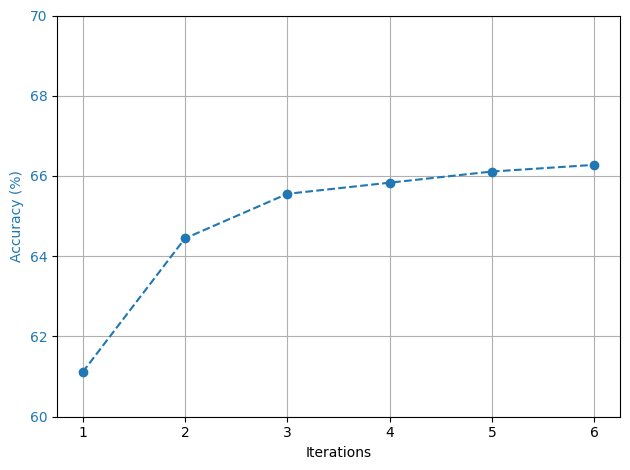

In [3]:
df['Percentage of Correct Migrations'] = df['Percentage of Correct Migrations'].str.replace(',', '.').astype(float) * 100

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Accuracy (%)', color=color)
ax1.plot(df['Max Number of Iterations'], df['Percentage of Correct Migrations'], color=color, linestyle='--', marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(60, 70)

# ax2 = ax1.twinx()
# color = 'tab:red'
# ax2.set_ylabel('Runtime (s)', color=color)
# ax2.plot(df['Max Number of Iterations'], df['Runtime'], color=color, linestyle='--', marker='o')
# ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
ax1.grid(True)
plt.show()


# prompt generation

In [4]:
df_gen = pd.DataFrame(pd.read_csv('code_3_gen.csv'))
df_gen = df_gen.rename(columns={'code_temp0_docs1_generate - score': 'score'})
df_gen = df_gen.drop(df_gen.columns.difference(['score']), 1)
df_nogen = pd.DataFrame(pd.read_csv('code_3_nogen.csv'))
df_nogen = df_nogen.rename(columns={'code_chunksize1024_currentmain_temp0_docs2 - score': 'score'})
df_nogen = df_nogen.drop(df_nogen.columns.difference(['score']), 1)

# the dataframe contains scores between 0 and 18. replace the column score with the percentage of correct migrations
df_gen['score'] = df_gen['score'] / 18 * 100
df_nogen['score'] = df_nogen['score'] / 18 * 100

/tmp/ipykernel_45001/305381425.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_gen = df_gen.drop(df_gen.columns.difference(['score']), 1)
/tmp/ipykernel_45001/305381425.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_nogen = df_nogen.drop(df_nogen.columns.difference(['score']), 1)


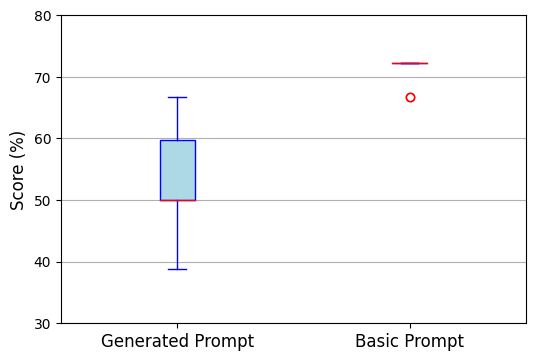

In [5]:
# create boxplots
fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot([df_gen['score'], df_nogen['score']], patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='blue'),
           capprops=dict(color='blue'),
           whiskerprops=dict(color='blue'),
           flierprops=dict(color='red', markeredgecolor='red'),
           medianprops=dict(color='red'))

ax.set_xticklabels(['Generated Prompt', 'Basic Prompt'], fontsize=12)
ax.set_ylabel('Score (%)', fontsize=12)
ax.set_ylim(30, 80)
ax.yaxis.grid(True)
plt.show()

# Temperature

In [6]:
import pandas as pd

df_temp = pd.DataFrame(pd.read_csv('temperature.csv'))
df_temp.head()

,Model Temperature,accuracy\n
0,0,"0,675"
1,"0,02","0,6583333333"
2,"0,05","0,6572222222"
3,"0,1","0,6472222222"
4,"0,15","0,6427777778"


In [7]:
df_temp['accuracy\n'] = df_temp['accuracy\n'].str.replace(',', '.').astype(float) * 100

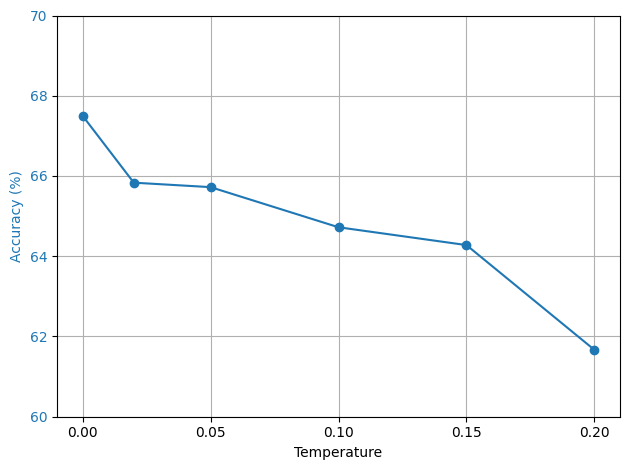

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Accuracy (%)', color=color)
x_values = df_temp['Model Temperature'].str.replace(',', '.').astype(float).round(2)
ax1.plot(x_values, df_temp['accuracy\n'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(60, 70)

# Set x-axis labels every 0.05
ax1.xaxis.set_major_locator(MultipleLocator(0.05))
# Format x-axis labels to show two decimals
ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.2f}'))

fig.tight_layout()
ax1.grid(True)

plt.show()

# final comparison

In [26]:
# load final_comparison.csv
df_final = pd.DataFrame(pd.read_csv('final_comparison.csv'))

# replace every value > 1 with 1
df_final = df_final.mask(df_final > 1, 1)

# create a new dataframe: for every column it should store the sum of all rows for that column
df_final_sum = df_final.sum().to_frame().T

# keep the header with the column names
df_final_sum.columns = df_final.columns

df_final_sum


,Step,baseline - iteration_solved.filterReduce,baseline - iteration_solved.filterReduce__MIN,baseline - iteration_solved.filterReduce__MAX,baseline - iteration_solved.flatMap,baseline - iteration_solved.flatMap__MIN,baseline - iteration_solved.flatMap__MAX,baseline - iteration_solved.frequentLetters,baseline - iteration_solved.frequentLetters__MIN,baseline - iteration_solved.frequentLetters__MAX,...,code_chunksize1024_currentmain_temp0_docs2 - iteration_solved.sparkContext__MAX,code_chunksize1024_currentmain_temp0_docs2 - iteration_solved.sparkJvmOrigin,code_chunksize1024_currentmain_temp0_docs2 - iteration_solved.sparkJvmOrigin__MIN,code_chunksize1024_currentmain_temp0_docs2 - iteration_solved.sparkJvmOrigin__MAX,code_chunksize1024_currentmain_temp0_docs2 - iteration_solved.sumNumbers,code_chunksize1024_currentmain_temp0_docs2 - iteration_solved.sumNumbers__MIN,code_chunksize1024_currentmain_temp0_docs2 - iteration_solved.sumNumbers__MAX,code_chunksize1024_currentmain_temp0_docs2 - iteration_solved.sumSquares,code_chunksize1024_currentmain_temp0_docs2 - iteration_solved.sumSquares__MIN,code_chunksize1024_currentmain_temp0_docs2 - iteration_solved.sumSquares__MAX
0,9,0,0,0,0,0,0,0,0,0,...,9,0,0,0,10,10,10,10,10,10


In [29]:
#remove all columns that end with __MIN or __MAX
df_final_sum = df_final_sum[df_final_sum.columns.drop(list(df_final_sum.filter(regex='__MIN')))]
df_final_sum = df_final_sum[df_final_sum.columns.drop(list(df_final_sum.filter(regex='__MAX')))]
df_baseline = df_final_sum.filter(regex='^baseline - ')
df_baseline.columns = df_baseline.columns.str.replace('baseline - iteration_solved.', '')
df_rag = df_final_sum.filter(regex='^code_chunksize1024_currentmain_temp0_docs2 - ')
df_rag.columns = df_rag.columns.str.replace('code_chunksize1024_currentmain_temp0_docs2 - iteration_solved.', '')

/tmp/ipykernel_45001/3701865936.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_baseline.columns = df_baseline.columns.str.replace('baseline - iteration_solved.', '')
/tmp/ipykernel_45001/3701865936.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_rag.columns = df_rag.columns.str.replace('code_chunksize1024_currentmain_temp0_docs2 - iteration_solved.', '')


In [30]:
df_baseline

,filterReduce,flatMap,frequentLetters,frequentWords,map,mapPartitions,mapReduce,mixedRDD,pi,prefixSpan,probability,quinnRddSparkContext,readJson,readJsonCsv,sparkContext,sparkJvmOrigin,sumNumbers,sumSquares
0,0,0,0,0,0,0,0,10,1,0,10,0,0,10,10,0,10,10


# Vectorstores variance

In [32]:
# read baseline_score.csv
df_baseline_score = pd.DataFrame(pd.read_csv('baseline_score.csv'))
#drop all columns but baseline - score
df_baseline_score = df_baseline_score.drop(df_baseline_score.columns.difference(['baseline - score']), 1)
df_baseline_score.columns = ['score']
# caluculate the variance in the column
df_baseline_score.var()

/tmp/ipykernel_45001/3554334911.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_baseline_score = df_baseline_score.drop(df_baseline_score.columns.difference(['baseline - score']), 1)


score    0.1
dtype: float64